# <a> Santander Product Recommendation </a>

## <b>Introduction</b><br></br>
><a> Santander Bank is a Spainsh Bank based in Madrid City of spain. It offers a lending hand to their customers through personalized product recommendations.
    Santander is challenging Kagglers to predict which products their existing customers will use in the next month based on their past behavior and that of similar customers.
With a more effective recommendation system in place, Santander can better meet the individual needs of all customers and ensure their satisfaction no matter where they are in life.</a>

## About the Data
><a> They have provided with 1.5 years of customers behavior data from Santander bank to predict what new products customers will purchase. The data starts at 2015-01-28 and has monthly records of products a customer has, such as "credit card", "savings account", etc. We will predict what additional products a customer will get in the last month, 2016-06-28, in addition to what they already have at 2016-05-28.</a>

### 1.  Data Importing and Understanding


In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
train_data = pd.read_csv("train_ver2.csv/train_ver2.csv")

In [3]:
# get the sample data for checking the imports
train_data.sample(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
2216765,2015-04-28,1204781,N,ES,H,27,2013-10-22,0.0,21,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,29.0,MALAGA,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
9040324,2016-01-28,1415244,N,ES,H,23,2015-07-25,0.0,6,1.0,NaN,1,A,S,N,NaN,KHQ,N,1.0,8.0,BARCELONA,0.0,88150.98,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
8461777,2015-12-28,1212002,N,ES,H,22,2013-10-30,0.0,26,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,122062.71,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
842204,2015-02-28,32977,N,ES,V,69,1996-02-12,0.0,233,1.0,NaN,1,I,S,N,NaN,KAT,N,1.0,28.0,MADRID,1.0,130750.02,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5571343,2015-09-28,933572,N,ES,H,24,2011-08-12,0.0,49,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,37.0,SALAMANCA,0.0,91423.41,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13331425,2016-05-28,1536141,N,ES,H,35,2016-02-29,1.0,3,1.0,NaN,1,I,S,N,NaN,KHM,N,1.0,9.0,BURGOS,0.0,NaN,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
10177827,2016-02-28,1446727,N,ES,H,21,2015-09-11,1.0,5,1.0,NaN,1.0,I,S,N,NaN,KHQ,N,1.0,8.0,BARCELONA,0.0,NaN,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
9882936,2016-01-28,961238,N,ES,V,29,2011-10-13,0.0,51,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,46.0,VALENCIA,1.0,58386.78,03 - UNIVERSITARIO,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,1
7658619,2015-11-28,167077,N,ES,V,50,2000-03-15,0.0,188,1.0,NaN,1,I,S,N,NaN,KAT,N,1.0,11.0,CADIZ,0.0,100842.78,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
11330829,2016-03-28,820809,N,ES,V,40,2008-12-03,0.0,87,1.0,NaN,1,I,S,N,NaN,KFC,N,1.0,28.0,MADRID,0.0,104209.86,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
train_data.shape

(13647309, 48)

> Around 136mn records are available and 48 parameters

In [5]:
# Basic Understanding of columns datatypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

In [6]:
# Convert the spanish columns name to English column name

train_data.columns = ['date_of_partition', 'customer_id', 'cust_emp_indx', 'cust_cntry_residance', 'cust_sex',
                      'cust_age', 'cust_joining_dt', 'cust_new_index', 'cust_antiquity', 
                      'cust_is_prim','last_dt_primary', 'cust_type', 'cust_relation','cust_residence_index', 
                      'cust_foreigner_index','cust_spose_index','cust_channel', 'cust_deceased_index',
                      'cust_address_type', 'cust_province_code', 'cust_province_name', 'cust_active_index', 'cust_gross_income',
                      'cust_segment', 'cust_saving_accnt', 'cust_guarntees', 'cust_current_accnt', 'cust_derivative_accnt',
                      'cust_payroll_accnt', 'cust_junior_accnt', 'cust_mass_particualr_accnt', 'cust_particualr_accnt', 
                      'cust_particular_plus_accnt','cust_shrt_term_deposit', 'cust_med_term_deposit', 'cust_long_term_deposit', 
                      'cust_e_account', 'cust_funds', 'cust_mortage', 'cust_pensions',
                      'cust_loans', 'cust_taxes', 'cust_credit_card', 'cust_securities', 'cust_home_account', 'cust_payroll',
                      'cust_pension_2', 'cust_direct_debit'
                     ]

In [7]:
# Checking the missing values 
train_data[train_data.columns[train_data.isnull().any()]].isnull().sum()

cust_emp_indx              27734
cust_cntry_residance       27734
cust_sex                   27804
cust_joining_dt            27734
cust_new_index             27734
cust_is_prim               27734
last_dt_primary         13622516
cust_type                 149781
cust_relation             149781
cust_residence_index       27734
cust_foreigner_index       27734
cust_spose_index        13645501
cust_channel              186126
cust_deceased_index        27734
cust_address_type          27735
cust_province_code         93591
cust_province_name         93591
cust_active_index          27734
cust_gross_income        2794375
cust_segment              189368
cust_payroll               16063
cust_pension_2             16063
dtype: int64

>From the above missing columns, looks like few customers have most of the information blank (27734). 
Let check those and if the most of data is not avaialble with us we can remove those rows from the dataset
as we have rich amount data to undestanding the pattern and Modelling

In [8]:
# Checking the rows which has employee index is null 
train_data[train_data.cust_emp_indx.isnull()].sample(10)

,date_of_partition,customer_id,cust_emp_indx,cust_cntry_residance,cust_sex,cust_age,cust_joining_dt,cust_new_index,cust_antiquity,cust_is_prim,last_dt_primary,cust_type,cust_relation,cust_residence_index,cust_foreigner_index,cust_spose_index,cust_channel,cust_deceased_index,cust_address_type,cust_province_code,cust_province_name,cust_active_index,cust_gross_income,cust_segment,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit
532205,2015-01-28,776245,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0
229763,2015-01-28,1327399,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2358963,2015-04-28,975819,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
288285,2015-01-28,1249306,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3043143,2015-05-28,861779,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0
1278446,2015-03-28,634180,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0
477627,2015-01-28,691290,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0
2346780,2015-04-28,1302728,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1691577,2015-03-28,1299263,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
519552,2015-01-28,860617,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


>The intution of about the 27734 data is correct. Most of the information about them is missing. So we are going to delete those rows from the data.

In [9]:
# Drop the rows which has most of the data is missing
missing_data_rows = train_data[train_data.cust_emp_indx.isnull()].index
train_data= train_data.drop(missing_data_rows, axis =0)
train_data.shape

(13619575, 48)

In [10]:
# Check the missing data again
(100*train_data[train_data.columns[train_data.isnull().any()]].isnull().sum()/len(train_data)).round(3)

cust_sex               0.001
last_dt_primary       99.818
cust_type              0.896
cust_relation          0.896
cust_spose_index      99.987
cust_channel           1.163
cust_address_type      0.000
cust_province_code     0.484
cust_province_name     0.484
cust_gross_income     20.314
cust_segment           1.187
cust_payroll           0.002
cust_pension_2         0.002
dtype: float64

> Around 99.9% of the data for the columns last_dt_primary & cust_spose_index is missing which is not adding much information in the analysis. so we can drop these 2 columns fromt the data set

In [11]:
#last_dt_primary & cust_spose_index is null for more than 99% 
train_data = train_data.drop(['last_dt_primary', 'cust_spose_index'], axis =1)

In [12]:
# Checking the missing values 
train_data[train_data.columns[train_data.isnull().any()]].isnull().sum()

cust_sex                   70
cust_type              122047
cust_relation          122047
cust_channel           158392
cust_address_type           1
cust_province_code      65857
cust_province_name      65857
cust_gross_income     2766641
cust_segment           161634
cust_payroll              217
cust_pension_2            217
dtype: int64

In [13]:
# Total Unique Customer 
train_data['customer_id'].nunique()

949614

In [14]:
train_data[train_data.isnull().any(axis =1)]['customer_id'].nunique()

278308

> Around 20% of the rows having atleast one column value is missing. Deleting the 20% of the customers might create a risk of loosing the treand of the data so let's try to impute the missing values.

In [15]:
#train_data = train_data.dropna()
train_data.shape

(13619575, 46)

In [16]:
# Checking the unique customer
train_data['customer_id'].nunique()

949614

In [17]:
# Products columns 
product_cols = ['cust_saving_accnt', 'cust_guarntees',
                'cust_current_accnt', 'cust_derivative_accnt',
                'cust_payroll_accnt', 'cust_junior_accnt', 
                'cust_mass_particualr_accnt', 'cust_particualr_accnt',
                'cust_particular_plus_accnt', 'cust_shrt_term_deposit',
                'cust_med_term_deposit', 'cust_long_term_deposit',
                'cust_e_account', 'cust_funds', 'cust_mortage', 
                'cust_pensions', 'cust_loans', 'cust_taxes',
                'cust_credit_card', 'cust_securities', 'cust_home_account',
                'cust_payroll', 'cust_pension_2', 'cust_direct_debit']

In [18]:
# Customer Demographic Details
customer_data_cols = ['date_of_partition','customer_id', 'cust_emp_indx',
       'cust_cntry_residance', 'cust_sex', 'cust_age', 'cust_joining_dt',
       'cust_new_index', 'cust_antiquity', 'cust_is_prim',
       'cust_type', 'cust_relation', 'cust_residence_index',
       'cust_foreigner_index', 'cust_channel',
       'cust_deceased_index', 'cust_address_type', 'cust_province_code',
       'cust_province_name', 'cust_active_index', 'cust_gross_income',
       'cust_segment']

> I have created two Buckets for the better analysing the Customer Demographic details and product behaviour. We will first look into the demographic behviour of the customer and then analysis the product the bank is offering

In [19]:
# Sample the data for Analysis 
unique_ids = pd.Series(train_data["customer_id"].unique())
unique_id = unique_ids.sample(frac=0.4, random_state =100)
sampled_df = train_data[train_data.customer_id.isin(unique_id)]
sampled_df.describe()

,customer_id,cust_new_index,cust_is_prim,cust_address_type,cust_province_code,cust_active_index,cust_gross_income,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit
count,5.444715e+06,5.444715e+06,5.444715e+06,5444715.0,5.418342e+06,5.444715e+06,4.339447e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444715e+06,5.444611e+06,5.444611e+06,5.444715e+06
mean,8.356048e+05,5.983050e-02,1.179037e+00,1.0,2.655427e+01,4.578056e-01,1.332147e+05,1.034030e-04,2.883530e-05,6.567903e-01,3.484113e-04,8.071901e-02,9.330516e-03,9.613726e-03,1.287408e-01,4.310345e-02,1.776769e-03,1.638286e-03,4.297764e-02,8.302326e-02,1.842025e-02,5.776244e-03,9.078161e-03,2.561016e-03,5.163209e-02,4.439773e-02,2.532621e-02,3.833258e-03,5.425567e-02,5.906446e-02,1.279626e-01
std,4.314681e+05,2.371725e-01,4.184924e+00,0.0,1.278928e+01,4.982165e-01,1.930626e+05,1.016820e-02,5.369774e-03,4.747808e-01,1.866253e-02,2.724031e-01,9.614291e-02,9.757717e-02,3.349129e-01,2.030900e-01,4.211428e-02,4.044258e-02,2.028067e-01,2.759174e-01,1.344654e-01,7.578179e-02,9.484593e-02,5.054164e-02,2.212831e-01,2.059771e-01,1.571140e-01,6.179454e-02,2.265215e-01,2.357453e-01,3.340482e-01
min,1.589000e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,3.731790e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.536800e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.875373e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.327940e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.016842e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199432e+06,0.000000e+00,1.000000e+00,1.0,3.400000e+01,1.000000e+00,1.557047e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553685e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.425324e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


> Data is very huge around 135 mn which is very time consuming for doing the analysis. so We are taking the sample of 40% of the data from teh whole datset for analyzing. 

In [20]:
# Shape of the sampled dataframe
sampled_df.shape

(5444715, 46)

In [21]:
# Unique customer in the sampled dataframe
sampled_df['customer_id'].nunique()

379846

> We are having around 54 mn records and 0.3 mn users for the EDA.

In [22]:
sampled_df.head()

,date_of_partition,customer_id,cust_emp_indx,cust_cntry_residance,cust_sex,cust_age,cust_joining_dt,cust_new_index,cust_antiquity,cust_is_prim,cust_type,cust_relation,cust_residence_index,cust_foreigner_index,cust_channel,cust_deceased_index,cust_address_type,cust_province_code,cust_province_name,cust_active_index,cust_gross_income,cust_segment,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,1,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,20.0,GIPUZKOA,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,10.0,CACERES,0.0,113194.98,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
11,2015-01-28,1050622,N,ES,H,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,17.0,GIRONA,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
12,2015-01-28,1050623,N,ES,H,23,2012-08-10,0.0,35,1.0,1,A,S,N,KHE,N,1.0,49.0,ZAMORA,1.0,113538.81,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [23]:
# Convert Datetime column type object to datetime
sampled_df['cust_joining_dt']  = pd.to_datetime(sampled_df['cust_joining_dt'], format = "%Y-%m")
sampled_df['date_of_partition']  = pd.to_datetime(sampled_df['date_of_partition'], format = "%Y-%m")

In [24]:
# Checking the data types of dates columns
sampled_df[['cust_joining_dt', 'date_of_partition']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5444715 entries, 0 to 13647308
Data columns (total 2 columns):
cust_joining_dt      datetime64[ns]
date_of_partition    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 124.6 MB


In [25]:
# Unique customer dates 
sampled_df['date_of_partition'].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

### Exploratory data analysis (EDA) - Customer Demographic 

> Total sampled data is around 54 mn in which each customer has multiple rows in given interval of 1.5 years. 
we do not need to keep the multiple records of customer because it may overcome the customer who has joined in last couple of months.

In [26]:
# Taking the unique customers 
customer_sampled_df =sampled_df[customer_data_cols].loc[sampled_df.groupby('customer_id').date_of_partition.idxmax()].reset_index()

In [27]:
# Unique Customer
customer_sampled_df['customer_id'].nunique()

379846

In [28]:
# Shape of the customer dataframe
customer_sampled_df.shape

(379846, 23)

In [29]:

customer_sampled_df.sample(5)

,index,date_of_partition,customer_id,cust_emp_indx,cust_cntry_residance,cust_sex,cust_age,cust_joining_dt,cust_new_index,cust_antiquity,cust_is_prim,cust_type,cust_relation,cust_residence_index,cust_foreigner_index,cust_channel,cust_deceased_index,cust_address_type,cust_province_code,cust_province_name,cust_active_index,cust_gross_income,cust_segment
125552,12719320,2016-05-28,660274,N,ES,H,46,2006-11-29,0.0,114,1.0,1.0,A,S,N,KAR,N,1.0,28.0,MADRID,1.0,137243.16,02 - PARTICULARES
71306,13086597,2016-05-28,377655,N,ES,V,58,2002-08-06,0.0,165,1.0,1,A,S,N,KAB,N,1.0,50.0,ZARAGOZA,1.0,110179.20,02 - PARTICULARES
281866,13570600,2016-05-28,1263793,N,ES,H,67,2014-06-17,0.0,23,1.0,1.0,A,S,N,KAT,N,1.0,36.0,PONTEVEDRA,0.0,241326.78,02 - PARTICULARES
250353,13644524,2016-05-28,1165664,N,ES,V,25,2013-08-14,0.0,33,1.0,1.0,I,S,N,KHE,N,1.0,26.0,"RIOJA, LA",0.0,47085.21,03 - UNIVERSITARIO
206959,13507872,2016-05-28,1029452,N,ES,V,29,2012-07-24,0.0,46,1.0,1,I,S,N,KHE,N,1.0,27.0,LUGO,0.0,NaN,03 - UNIVERSITARIO


#### First let's check the parameters which has missing values

In [30]:
# cust_sex H---> Female V---> Male
100*(customer_sampled_df['cust_sex'].value_counts()/len(customer_sampled_df)).round(4)

V    54.28
H    45.72
Name: cust_sex, dtype: float64

In [31]:
# Checking the missing rows for the cust_sex column
customer_sampled_df['cust_sex'].isnull().sum()

1

In [32]:
# Only one customer has the missing gender. 
# Let's Check that data 
customer_sampled_df[customer_sampled_df['cust_sex'].isnull()]


,index,date_of_partition,customer_id,cust_emp_indx,cust_cntry_residance,cust_sex,cust_age,cust_joining_dt,cust_new_index,cust_antiquity,cust_is_prim,cust_type,cust_relation,cust_residence_index,cust_foreigner_index,cust_channel,cust_deceased_index,cust_address_type,cust_province_code,cust_province_name,cust_active_index,cust_gross_income,cust_segment
74781,13087918,2016-05-28,394860,N,ES,NaN,2,1999-07-14,0.0,202,1.0,1,A,S,N,013,N,1.0,28.0,MADRID,1.0,NaN,02 - PARTICULARES


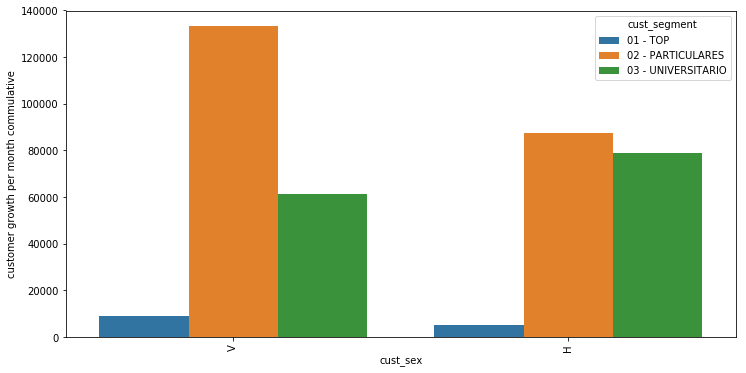

In [33]:
# Plot the data in line chart
plt.figure(figsize=(12,6))
sns.countplot(customer_sampled_df['cust_sex'], hue= customer_sampled_df['cust_segment'])
plt.xticks(rotation=90)
plt.ylabel('customer growth per month commulative')
plt.show()



> Out of total sampled customer 54% are male and 46% of female out of which most of the mens are particulars. so we can fill are missing customer sex with V(Male)


In [34]:
customer_sampled_df['cust_sex'] = customer_sampled_df['cust_sex'].fillna('V')

In [35]:
100*(customer_sampled_df['cust_type'].value_counts()/len(customer_sampled_df)).round(3)


1.0    48.5
1.0    30.4
1      20.2
3.0     0.0
3       0.0
3.0     0.0
P       0.0
2       0.0
2.0     0.0
2.0     0.0
4.0     0.0
4       0.0
4.0     0.0
Name: cust_type, dtype: float64


> Around 99.2% of the values are 1 so we can drop this column 

In [36]:
# Drop the cust type coulum
customer_sampled_df = customer_sampled_df.drop('cust_type', axis =1)

In [37]:
#cust_relation A (active), I (inactive), P (former customer),R (Potential)
(100*customer_sampled_df['cust_relation'].value_counts()/len(customer_sampled_df)).round(3)


I    56.926
A    42.158
P     0.086
R     0.013
Name: cust_relation, dtype: float64

> Around 99% of the people fall under either Active or Inactive customer relation

In [38]:
# replace other than I and A customer relation to othres
customer_sampled_df["cust_relation"] = customer_sampled_df["cust_relation"].replace(["P", "R"], "Others")

In [39]:
customer_sampled_df['cust_relation'].isnull().sum()

3106

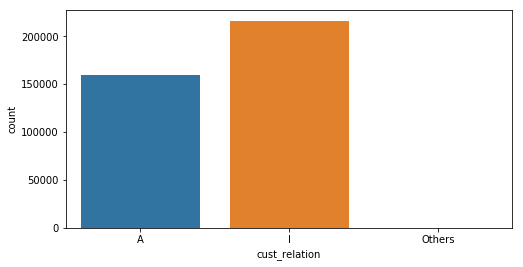

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(customer_sampled_df['cust_relation'])

In [41]:
# let's fill the value I to all the null values
customer_sampled_df['cust_relation'] = customer_sampled_df['cust_relation'].fillna('I')

In [42]:
# Cust_channel
(100*customer_sampled_df['cust_channel'].value_counts()/len(customer_sampled_df)).round(3)[:10]

KHE    26.741
KAT    21.863
KFC    21.394
KHQ     8.063
KHM     3.493
KFA     2.740
KHN     1.934
KHK     1.901
KHD     0.786
RED     0.657
Name: cust_channel, dtype: float64

> From the above chart, it's looks like all the new active users are connected through different channels. we can replace all the active users missign channel to Others

In [43]:
customer_sampled_df["cust_channel"].isnull().sum()

4657

In [44]:
# Around 70% of the channel is covered by 3 of the medium so we can mark the other channel 
#into "Others" and missing values also defined in others as unkown channel

channels  = set(customer_sampled_df["cust_channel"].unique())
channels = list(channels - {'KHE', 'KAT', 'KFC'})
customer_sampled_df["cust_channel"] = customer_sampled_df["cust_channel"].replace(channels, "Others")

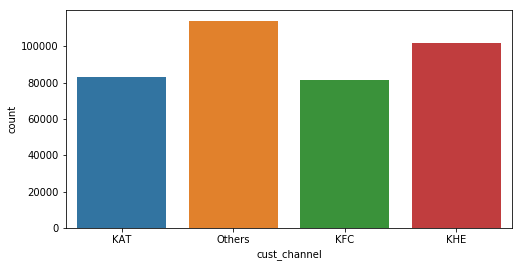

In [45]:
plt.figure(figsize=(8,4))
sns.countplot(customer_sampled_df['cust_channel'])

In [46]:
# cust_address_type 1. Primary 99 .secondary
customer_sampled_df['cust_address_type'].value_counts()

1.0    379846
Name: cust_address_type, dtype: int64

> Columnns is having constant value. we can drop this column as it's not adding any value to data.

In [47]:
# dropping the columns 
customer_sampled_df = customer_sampled_df.drop('cust_address_type', axis =1)

> Province code and Province name are having the same information in different format. so we can delete the one of them

In [48]:
# dropping the columns 
customer_sampled_df = customer_sampled_df.drop('cust_province_code', axis =1)

In [49]:
#cust_province_name
(100*customer_sampled_df["cust_province_name"].value_counts()/len(customer_sampled_df)).round(3)[:10]

MADRID       32.049
BARCELONA     9.533
VALENCIA      5.163
SEVILLA       4.364
CORUÑA, A     3.068
MURCIA        2.981
MALAGA        2.639
ZARAGOZA      2.463
ALICANTE      2.409
CADIZ         2.149
Name: cust_province_name, dtype: float64

In [50]:
customer_sampled_df["cust_province_name"].isnull().sum()

1615

In [51]:
customer_sampled_df[(customer_sampled_df["cust_province_name"].isnull())]["cust_cntry_residance"].unique()

array(['IN', 'US', 'FR', 'GB', 'IT', 'CL', 'CH', 'CR', 'AT', 'AR', 'BE',
       'MA', 'DE', 'SE', 'RS', 'MX', 'NL', 'BR', 'DO', 'PA', 'AU', 'EC',
       'PT', 'CM', 'KE', 'CO', 'CA', 'RU', 'IE', 'LU', 'JP', 'DK', 'VE',
       'PE', 'GI', 'CU', 'NZ', 'PH', 'FI', 'RO', 'GR', 'GQ', 'AE', 'AO',
       'CN', 'TR', 'PL', 'UY', 'BG', 'HR', 'IL', 'BY', 'HK', 'BO', 'BA',
       'OM', 'MD', 'SK', 'UA', 'HU', 'HN', 'TN', 'SG', 'SA', 'MT', 'SV',
       'AD', 'NG', 'PR', 'ES', 'NO', 'EE', 'PY', 'MZ', 'GT', 'GA', 'TH',
       'CD', 'ZA', 'CF', 'MR', 'LT', 'GW', 'LV', 'EG', 'DZ', 'MK', 'GN',
       'CG', 'PK', 'KR', 'NI', 'BM', 'CZ', 'ZW', 'TW'], dtype=object)

> For the foreign customers the province name is missing. we can fill this with the "Unknown"

In [52]:
customer_sampled_df["cust_province_name"] = customer_sampled_df["cust_province_name"].fillna("Unknown")

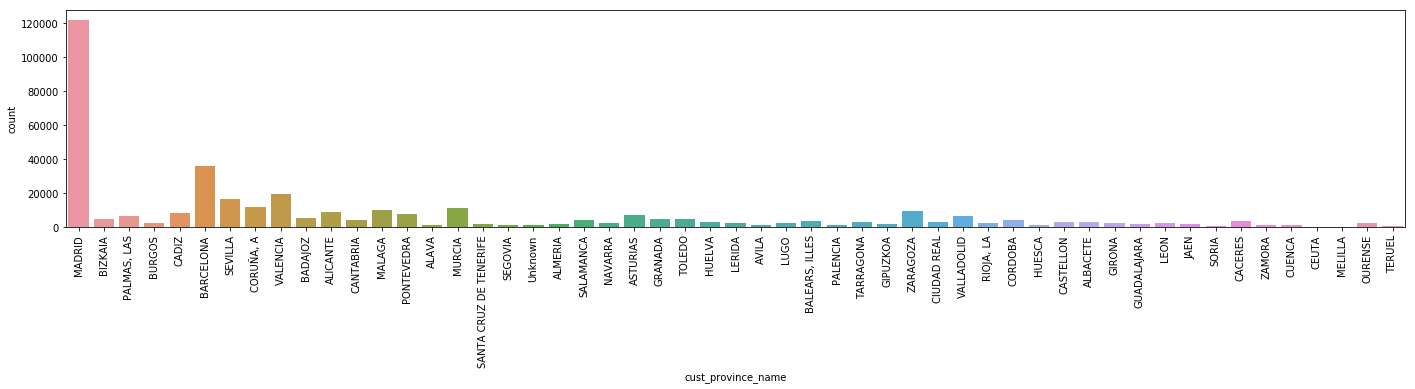

In [53]:
plt.figure(figsize=(24,4))
sns.countplot(customer_sampled_df["cust_province_name"])
plt.xticks(rotation=90)
plt.show()

In [54]:
# Around 55% of the customer belong to only 4 Province of spain (MADRID, BARCELONA, VALENCIA, SEVILLIA)
total_province  = set(customer_sampled_df["cust_province_name"].unique())
total_province_exclude = list(total_province - {'MADRID', 'BARCELONA', 'VALENCIA', "SEVILLA"})
customer_sampled_df["cust_province_name"] = customer_sampled_df["cust_province_name"].replace(total_province_exclude, "Others")


In [55]:
# cust_segment --> segmentation: 01 - VIP, 02 - Individuals 03 - college graduated
customer_sampled_df["cust_segment"].value_counts()



02 - PARTICULARES     220625
03 - UNIVERSITARIO    140138
01 - TOP               14310
Name: cust_segment, dtype: int64

In [56]:
customer_sampled_df["cust_segment"].isnull().sum()

4773

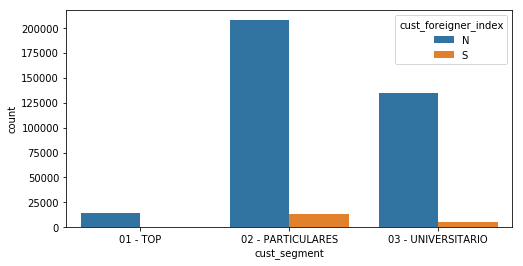

In [57]:
plt.figure(figsize=(8,4))
sns.countplot(customer_sampled_df['cust_segment'], hue= customer_sampled_df['cust_foreigner_index'])

In [58]:
customer_sampled_df["cust_segment"]=customer_sampled_df["cust_segment"].fillna("02 - PARTICULARES")

In [59]:
# Cust_pension is an product if value is not available then we mark it as 0
sampled_df["cust_pension_2"].value_counts()

0.0    5123028
1.0     321583
Name: cust_pension_2, dtype: int64

In [60]:
#cust_payroll              
  
sampled_df["cust_payroll"].value_counts()

0.0    5149210
1.0     295401
Name: cust_payroll, dtype: int64

In [61]:
sampled_df["cust_pension_2"] = sampled_df["cust_pension_2"].fillna(0.0)
sampled_df["cust_payroll"] = sampled_df["cust_payroll"].fillna(0.0)

In [62]:
# Customer Gross Income
customer_sampled_df['cust_gross_income'] = customer_sampled_df['cust_gross_income']
customer_sampled_df['cust_gross_income'].describe()


count    2.836220e+05
mean     1.331003e+05
std      1.980293e+05
min      3.731790e+03
25%      6.853379e+04
50%      1.013102e+05
75%      1.553190e+05
max      2.425324e+07
Name: cust_gross_income, dtype: float64

In [63]:
customer_sampled_df['cust_gross_income'].isnull().sum()

96224

In [64]:
particular_mean= customer_sampled_df[(customer_sampled_df.cust_gross_income.notna())
                &                     (customer_sampled_df["cust_segment"]== "02 - PARTICULARES")]["cust_gross_income"].mean()
top_mean= customer_sampled_df[(customer_sampled_df.cust_gross_income.notna())
                &                     (customer_sampled_df["cust_segment"]== "01 - TOP")]["cust_gross_income"].mean()
univ_mean= customer_sampled_df[(customer_sampled_df.cust_gross_income.notna())
                &                     (customer_sampled_df["cust_segment"]== "03 - UNIVERSITARIO")]["cust_gross_income"].mean()



In [65]:
customer_sampled_df[(customer_sampled_df.cust_gross_income.isnull())
                &   (customer_sampled_df["cust_segment"]== "02 - PARTICULARES")].fillna(particular_mean, inplace=True)
customer_sampled_df[(customer_sampled_df.cust_gross_income.isnull())
                &   (customer_sampled_df["cust_segment"]== "01 - TOP")].fillna(top_mean,inplace=True)
customer_sampled_df[(customer_sampled_df.cust_gross_income.isnull())
                &   (customer_sampled_df["cust_segment"]== "03 - UNIVERSITARIO")].fillna(univ_mean, inplace=True)

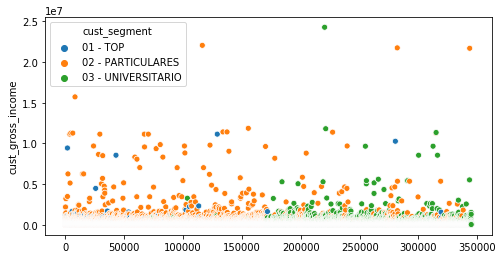

In [66]:
plt.figure(figsize=(8,4))
sns.scatterplot(y=customer_sampled_df['cust_gross_income'],
                x= customer_sampled_df.index, 
                hue=customer_sampled_df['cust_segment'] )


> Replace the missing value of gross income with mean of group in which they lie. if the missing gross income customer lie in indiviual level tehn their gross income would be mean of that group

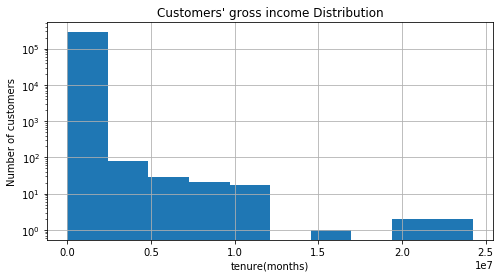

In [67]:
plt.figure(figsize=(8,4))
customer_sampled_df['cust_gross_income'].hist(bins=10)
plt.title("Customers' gross income Distribution")
plt.xlabel("tenure(months)")
plt.ylabel("Number of customers") 
plt.yscale("log")

In [68]:
# Customer employee index Employee index: A active, B ex employed, F filial, N not employee, P pasive
(100*customer_sampled_df['cust_emp_indx'].value_counts()/len(customer_sampled_df)).round(2)

N    99.95
B     0.02
F     0.02
A     0.01
S     0.00
Name: cust_emp_indx, dtype: float64

> 99.95% employee index are same (Non employee N), Adding no information to the data.so we are dropping this column

In [69]:
# Dropping the cust_emp_index
customer_sampled_df = customer_sampled_df.drop("cust_emp_indx" , axis =1)

In [70]:
# Customer Country residance

# Top 5 country residance
100*(customer_sampled_df['cust_cntry_residance'].value_counts()/len(customer_sampled_df)).round(4)[:5]

ES    99.58
FR     0.03
AR     0.03
GB     0.03
DE     0.03
Name: cust_cntry_residance, dtype: float64

> The bank is from the spain. so most of the customer is from the spain only(99.5%). Only 0.42% is from the country. The data highle skewed towards the Spain (ES) as country residance. So we can drop this column from the data set

In [71]:
# drop the columns cust_cntry_residance
customer_sampled_df = customer_sampled_df.drop("cust_cntry_residance" , axis =1)

In [72]:
# Age
# Convert the age into int data type
customer_sampled_df['cust_age'] = customer_sampled_df['cust_age'].astype(int)

In [73]:
customer_sampled_df['cust_age'].describe()

count    379846.000000
mean         40.137758
std          17.148025
min           2.000000
25%          25.000000
50%          38.000000
75%          50.000000
max         127.000000
Name: cust_age, dtype: float64

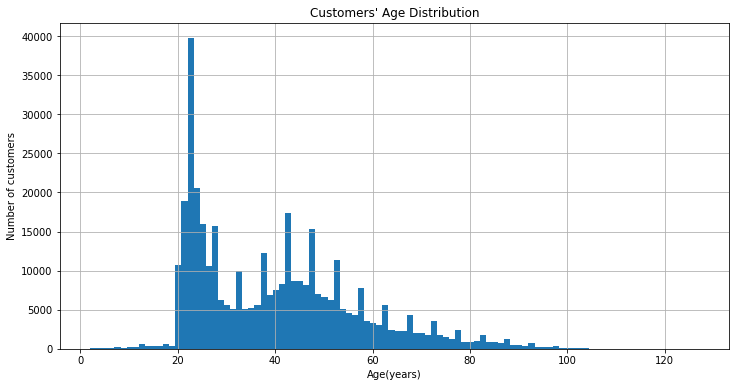

In [74]:
plt.figure(figsize=(12,6))
customer_sampled_df['cust_age'].hist(bins=100)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 
plt.show()

> From the distribution, it's look like there is large population of customer in beetween 21-30 years. and there is few customers who are more 70+ which is more like pension accounts and few are which is less than 15. it might be opened for the student account. 


In [75]:
# cust_new_index 1 if the customer registered in the last 6 months.
(100*customer_sampled_df['cust_new_index'].value_counts()/len(customer_sampled_df)).round(3)

0.0    95.396
1.0     4.604
Name: cust_new_index, dtype: float64

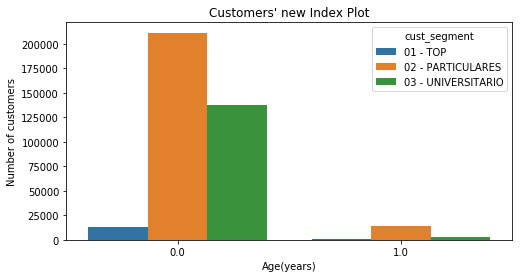

In [76]:
plt.figure(figsize=(8,4))
sns.countplot(customer_sampled_df['cust_new_index'], hue= customer_sampled_df['cust_segment'] )
plt.title("Customers' new Index Plot")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 
plt.show()

> Around 5% of customers are those who have joined in last six months.

In [77]:
#cust_joining_dt and cust_antiquity having the same amount of information
#customer_sampled_df = customer_sampled_df.drop(["cust_joining_dt"], axis =1)

In [78]:
# cust_antiquity
customer_sampled_df['cust_antiquity'] = customer_sampled_df['cust_antiquity'].astype(int)
customer_sampled_df['cust_antiquity'].describe()

count    379846.000000
mean         76.232315
std        1624.064631
min     -999999.000000
25%          22.000000
50%          53.000000
75%         133.000000
max         256.000000
Name: cust_antiquity, dtype: float64

> -999999 does not make any sense. let's check the data 

> Antiquity can be find from the date of date of Joining. we will find the difference of month between date of partition and date of joining  

In [79]:
customer_sampled_df.loc[customer_sampled_df.cust_antiquity == -999999, 'cust_antiquity'] = \
customer_sampled_df[customer_sampled_df['cust_antiquity'] >=0].cust_antiquity.median()
customer_sampled_df['cust_antiquity'].describe()

count    379846.000000
mean         78.865098
std          67.305775
min           0.000000
25%          22.000000
50%          53.000000
75%         133.000000
max         256.000000
Name: cust_antiquity, dtype: float64

In [80]:
customer_sampled_df['cust_antiquity'] = customer_sampled_df['cust_antiquity']//12

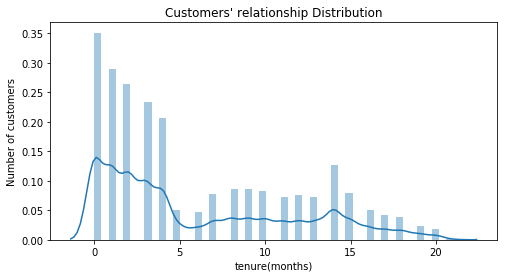

In [81]:
plt.figure(figsize=(8,4))
sns.distplot(customer_sampled_df['cust_antiquity'])
#customer_sampled_df['cust_antiquity'].hist(bins=50)
plt.title("Customers' relationship Distribution")
plt.xlabel("tenure(months)")
plt.ylabel("Number of customers")

plt.show()

In [82]:
# Cust_is_prim
(100*customer_sampled_df['cust_is_prim'].value_counts()/len(customer_sampled_df['cust_is_prim'])).round(3)

1.0     97.933
99.0     2.067
Name: cust_is_prim, dtype: float64

In [83]:
customer_sampled_df.loc[customer_sampled_df.cust_is_prim == 99.0, 'cust_is_prim'] = 'non_primary'
customer_sampled_df.loc[customer_sampled_df.cust_is_prim == 1.0, 'cust_is_prim'] = 'primary'

In [84]:
# cust_residence_index
customer_sampled_df['cust_residence_index'].value_counts()

S    378232
N      1614
Name: cust_residence_index, dtype: int64

In [85]:
# cust_residence_index
customer_sampled_df['cust_foreigner_index'].value_counts()

N    360766
S     19080
Name: cust_foreigner_index, dtype: int64

In [86]:
#cust_deceased_index
customer_sampled_df['cust_deceased_index'].value_counts()/len(customer_sampled_df)

N    0.997067
S    0.002933
Name: cust_deceased_index, dtype: float64

In [87]:
# cust_active_index = 1  --> Active 0---> InActive
customer_sampled_df['cust_active_index'].value_counts()

0.0    221196
1.0    158650
Name: cust_active_index, dtype: int64

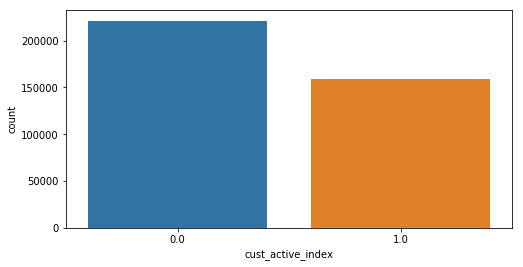

In [88]:
plt.figure(figsize=(8,4))
sns.countplot(customer_sampled_df['cust_active_index'])

In [89]:
# Product

sampled_df.groupby('date_of_partition')[product_cols].sum()

,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit
date_of_partition,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-28,36,8,194144,105,23362,3012,3281,42255,14334,542,632,14376,24032,5500,1942,2934,837,14537,14255,7961,1269,15394.0,17161.0,38095
2015-02-28,36,9,194683,103,23874,3004,3223,42132,14274,755,627,14213,24348,5622,1940,2925,834,14628,13740,7934,1265,16118.0,17778.0,37715
2015-03-28,36,10,195097,109,24241,3004,3108,42019,14210,906,615,13949,24732,5800,1937,2921,830,14729,13982,7864,1260,16978.0,17459.0,38833
2015-04-28,36,10,195330,109,24793,3006,2958,41840,14146,974,594,13960,25062,5941,1933,2914,835,15071,14375,7847,1257,16737.0,18439.0,39209
2015-05-28,36,10,195776,116,25277,3005,2806,41786,14112,857,576,14024,25438,6023,1869,2909,834,15208,14467,7856,1255,16382.0,16844.0,38577
2015-06-28,34,10,197626,118,23830,2989,2715,41686,14045,749,570,13989,25707,6013,1851,2912,819,16389,14666,7726,1247,17266.0,18984.0,39421
2015-07-28,33,9,201493,117,24548,2985,2734,41545,13964,771,550,13968,25868,5995,1846,2908,816,16607,14799,7758,1248,17794.0,19703.0,40053
2015-08-28,33,9,205906,119,25121,2969,2766,41435,13918,788,545,13969,25959,6007,1841,2907,816,16720,14695,7880,1241,16950.0,18711.0,38316
2015-09-28,32,9,211882,113,25380,2960,2831,41290,13840,809,535,14013,26093,5987,1837,2903,818,16816,14431,7970,1234,17249.0,19019.0,40231


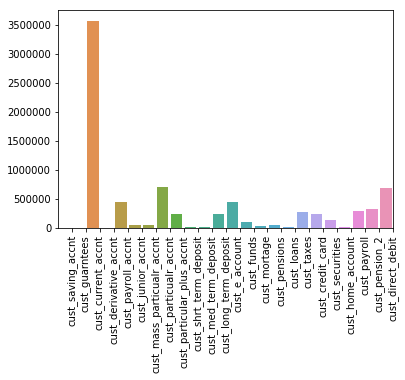

In [90]:
sns.barplot(np.arange(24), sampled_df[product_cols].sum())
plt.xticks(np.arange(24) + 0.5, product_cols, rotation=90)
plt.show()

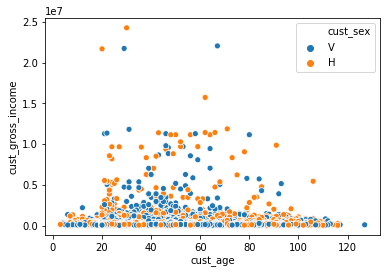

In [91]:
#sns.scatterplot(y=customer_sampled_df['cust_gross_income'], x= customer_sampled_df.index, hue = customer_sampled_df['cust_sex'])
sns.scatterplot(y=customer_sampled_df['cust_gross_income'], x= customer_sampled_df.cust_age, hue = customer_sampled_df['cust_sex'])

In [92]:
# Checking the customer count on every month
user_per_month_growth = sampled_df.groupby('date_of_partition')["customer_id"].count()

In [93]:
user_per_month_growth

date_of_partition
2015-01-28    247164
2015-02-28    248419
2015-03-28    249416
2015-04-28    250266
2015-05-28    251198
2015-06-28    251941
2015-07-28    331629
2015-08-28    337026
2015-09-28    345960
2015-10-28    356716
2015-11-28    362335
2015-12-28    364710
2016-01-28    366325
2016-02-28    368172
2016-03-28    369857
2016-04-28    371131
2016-05-28    372450
Name: customer_id, dtype: int64

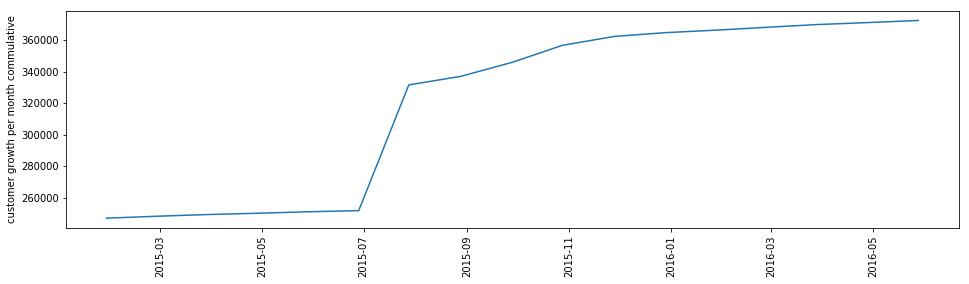

In [94]:
# Plot the data in line chart
plt.figure(figsize=(16,4))
plt.plot(user_per_month_growth)
plt.xticks(rotation=90)
plt.ylabel('customer growth per month commulative')
plt.show()

> Customer to the bank has shooten up from the July 2015 and after that it's quite constant. Let's deep dive into the July to get the reason for the this high amount of activity with the bank.

In [95]:
# Checking the new customers who enrolled on the same month
sampled_df["is_joined_this_month"] = (sampled_df["date_of_partition"].dt.strftime("%Y-%m") == sampled_df["cust_joining_dt"].dt.strftime("%Y-%m"))*1

In [96]:
new_user_per_month_growth = sampled_df.groupby('date_of_partition')["is_joined_this_month"].sum()
new_user_per_month_growth

date_of_partition
2015-01-28      872
2015-02-28     1048
2015-03-28      894
2015-04-28      783
2015-05-28      806
2015-06-28      721
2015-07-28     6613
2015-08-28     5801
2015-09-28     9348
2015-10-28    11238
2015-11-28     6192
2015-12-28     2991
2016-01-28     2684
2016-02-28     2374
2016-03-28     2045
2016-04-28     1821
2016-05-28     1769
Name: is_joined_this_month, dtype: int32

In [97]:
# Customer have joined in 2016 
sampled_df[sampled_df["cust_joining_dt"].dt.year ==2016]


,date_of_partition,customer_id,cust_emp_indx,cust_cntry_residance,cust_sex,cust_age,cust_joining_dt,cust_new_index,cust_antiquity,cust_is_prim,cust_type,cust_relation,cust_residence_index,cust_foreigner_index,cust_channel,cust_deceased_index,cust_address_type,cust_province_code,cust_province_name,cust_active_index,cust_gross_income,cust_segment,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit,is_joined_this_month
9028664,2016-01-28,1434071,N,ES,V,52,2016-01-04,1.0,0,1.0,1.0,A,S,N,NaN,N,1.0,46.0,VALENCIA,1.0,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1
9047066,2016-01-28,1423375,N,ES,H,30,2016-01-05,1.0,6,1.0,2.0,A,S,N,KHM,N,1.0,26.0,"RIOJA, LA",1.0,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,1
9056808,2016-01-28,1467172,N,ES,H,55,2016-01-12,1.0,0,1.0,P,R,S,N,NaN,N,1.0,24.0,LEON,1.0,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,1
9059921,2016-01-28,1464737,N,ES,V,73,2016-01-13,1.0,0,1.0,P,R,S,N,NaN,N,1.0,28.0,MADRID,1.0,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1
9060438,2016-01-28,1463135,N,ES,V,37,2016-01-11,1.0,4,1.0,2.0,A,S,N,KHN,N,1.0,28.0,MADRID,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1
9066311,2016-01-28,1469347,N,ES,H,46,2016-01-11,1.0,0,1.0,P,R,S,N,NaN,N,1.0,28.0,MADRID,1.0,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1
9066462,2016-01-28,1469398,N,ES,H,32,2016-01-26,1.0,3,1.0,2,I,S,N,KHN,N,1.0,28.0,MADRID,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1
9070728,2016-01-28,1452600,N,ES,H,23,2016-01-22,1.0,0,1.0,P,R,S,N,NaN,N,1.0,28.0,MADRID,1.0,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1
9073524,2016-01-28,1445147,N,ES,H,56,2016-01-28,1.0,0,1.0,P,R,S,N,NaN,N,1.0,50.0,ZARAGOZA,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1
9085564,2016-01-28,83106,N,ES,H,67,2016-01-10,0.0,216,1.0,2.0,A,S,N,KFC,N,1.0,28.0,MADRID,1.0,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1


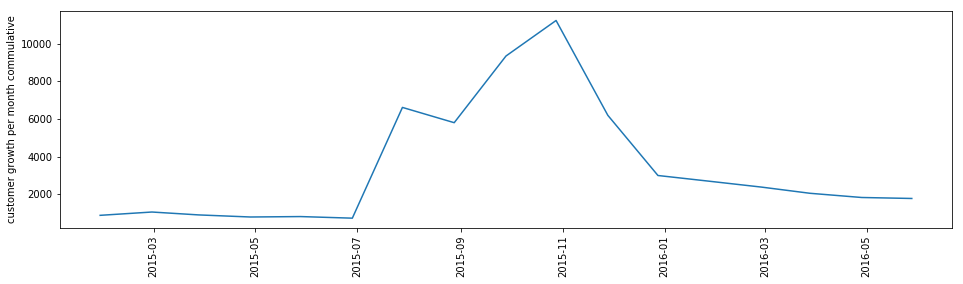

In [98]:
# Plot the data in line chart
plt.figure(figsize=(16,4))
plt.plot(new_user_per_month_growth)
plt.plot()
plt.xticks(rotation=90)
plt.ylabel('customer growth per month commulative')
plt.show()

> This is quite strange that there is no new customer have came in year 2016. Let's Check the other scenarios where lot of existing user come active in July 2015 to buy some product or may be to just revive the account


> Customer to the bank has shooten up from the July 2015 and after that it's quite constant. Let's deep dive into the July to get the reason for the this high amount of activity with the bank.

In [99]:
# Taking the unique customers 
customer_first_appearnce_df =sampled_df.loc[sampled_df.groupby('customer_id').date_of_partition.idxmin()].reset_index()


In [100]:
customer_first_appearnce = customer_first_appearnce_df.groupby('date_of_partition')["customer_id"].count()
customer_first_appearnce

date_of_partition
2015-01-28    247164
2015-02-28      1785
2015-03-28      1533
2015-04-28      1388
2015-05-28      1361
2015-06-28      1257
2015-07-28     77141
2015-08-28      5976
2015-09-28      9524
2015-10-28     11441
2015-11-28      6438
2015-12-28      3133
2016-01-28      2862
2016-02-28      2600
2016-03-28      2384
2016-04-28      1954
2016-05-28      1905
Name: customer_id, dtype: int64

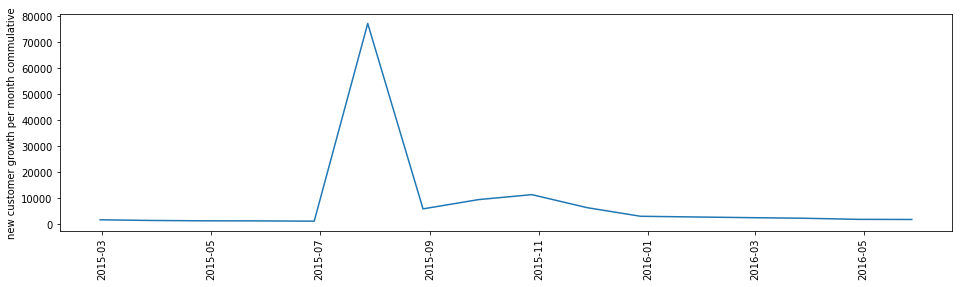

In [101]:
# Plot the data in line chart
plt.figure(figsize=(16,4))
plt.plot(customer_first_appearnce[1:])
plt.plot()
plt.xticks(rotation=90)
plt.ylabel('new customer growth per month commulative')
plt.show()

> From the above graph, it's proved that lot of users shown up month of June. Now let's check the other hypothesis

In [102]:
# Filter the data for Aug 2015
customer_appear_jul_2k15_df =customer_first_appearnce_df[customer_first_appearnce_df["date_of_partition"].dt.month ==7]

customer_appear_jul_2k15_df = customer_appear_jul_2k15_df.drop("index", axis =1)
customer_appear_jul_2k15_df.head()
customer_appear_jul_2k15_df.reset_index().head()


,index,date_of_partition,customer_id,cust_emp_indx,cust_cntry_residance,cust_sex,cust_age,cust_joining_dt,cust_new_index,cust_antiquity,cust_is_prim,cust_type,cust_relation,cust_residence_index,cust_foreigner_index,cust_channel,cust_deceased_index,cust_address_type,cust_province_code,cust_province_name,cust_active_index,cust_gross_income,cust_segment,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit,is_joined_this_month
0,8,2015-07-28,15915,N,ES,V,56,1995-07-21,0.0,246,1.0,1,A,S,N,KAT,N,1.0,28.0,MADRID,0.0,331242.63,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
1,30,2015-07-28,15984,N,ES,H,55,1998-03-24,0.0,246,1.0,1,I,S,N,KAT,N,1.0,28.0,MADRID,0.0,484414.65,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
2,34,2015-07-28,15990,N,ES,H,77,1995-11-30,0.0,246,1.0,1,I,S,N,KAT,N,1.0,9.0,BURGOS,0.0,182203.71,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
3,41,2015-07-28,16011,N,ES,H,58,1995-01-23,0.0,246,1.0,1,I,S,N,KAT,N,1.0,28.0,MADRID,0.0,1297731.84,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
4,42,2015-07-28,16017,N,ES,H,60,1995-01-31,0.0,246,1.0,1,I,S,N,KAT,N,1.0,28.0,MADRID,0.0,151758.00,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0


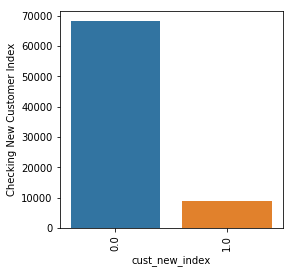

In [103]:

# Plot the data in line chart
plt.figure(figsize=(4,4))
#plt.plot(customer_first_appearnce[1:])
sns.countplot(customer_appear_jul_2k15_df["cust_new_index"])
plt.xticks(rotation=90)
plt.ylabel('Checking New Customer Index')
plt.show()



> This shows that lot of users who first appeared only on this month are old existing users those join atleast 6 months ago



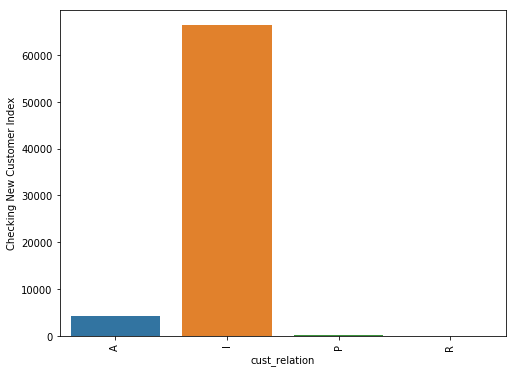

In [104]:
plt.figure(figsize=(8,6))
sns.countplot(customer_appear_jul_2k15_df["cust_relation"])
plt.xticks(rotation=90)
plt.ylabel('Checking New Customer Index')
plt.show()




> Most of the inactive Users are came in this month. may be becuase bank send them notice about too much inactivity to the account and further inactivity might cause termination of account fromt the bank



In [105]:

# Checking the change product buying behviour

customer_first_appearnce_df.groupby("date_of_partition")[product_cols].sum()

,cust_saving_accnt,cust_guarntees,cust_current_accnt,cust_derivative_accnt,cust_payroll_accnt,cust_junior_accnt,cust_mass_particualr_accnt,cust_particualr_accnt,cust_particular_plus_accnt,cust_shrt_term_deposit,cust_med_term_deposit,cust_long_term_deposit,cust_e_account,cust_funds,cust_mortage,cust_pensions,cust_loans,cust_taxes,cust_credit_card,cust_securities,cust_home_account,cust_payroll,cust_pension_2,cust_direct_debit
date_of_partition,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-28,36,8,194144,105,23362,3012,3281,42255,14334,542,632,14376,24032,5500,1942,2934,837,14537,14255,7961,1269,15394.0,17161.0,38095
2015-02-28,0,0,1500,0,42,21,47,6,1,183,0,20,9,2,0,1,0,4,25,4,0,30.0,36.0,43
2015-03-28,0,0,1321,0,26,19,51,2,0,109,0,37,7,1,0,2,0,2,28,1,0,37.0,37.0,47
2015-04-28,0,0,1164,0,40,27,37,2,2,99,0,46,12,2,0,2,0,3,20,1,0,29.0,32.0,33
2015-05-28,0,0,1163,0,27,23,36,3,1,84,0,37,10,8,0,1,0,0,18,9,0,25.0,26.0,35
2015-06-28,0,0,1043,0,28,20,62,4,0,86,0,39,9,1,0,2,0,3,18,2,0,37.0,37.0,31
2015-07-28,0,0,4833,0,29,22,65,1,1,111,0,50,8,2,0,1,0,1,18,4,0,42.0,42.0,36
2015-08-28,0,0,4361,0,10,9,41,0,0,77,0,17,1,1,0,0,0,1,1,0,0,13.0,13.0,29
2015-09-28,0,0,6375,0,17,16,49,0,0,79,0,26,2,0,0,1,0,1,1,2,0,21.0,21.0,36


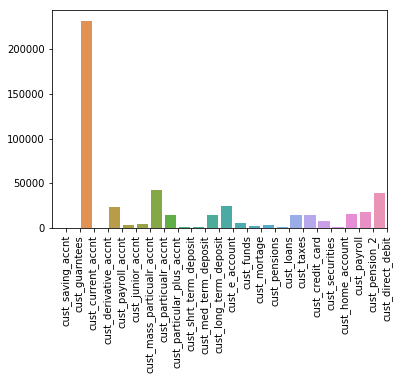

In [106]:
sns.barplot(np.arange(24), list(customer_first_appearnce_df[product_cols].sum()))
plt.xticks(np.arange(24) + 0.5, product_cols, rotation=90)
plt.show()